<a href="https://colab.research.google.com/github/cagutierrezgu/My_Portfolio/blob/main/Faces%20and%20gender%20prediction/Models%20and%20evaluation/Convolutional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Modeling and evaluation

### Convolutional networks

Uno de los modelos a implementar será una red neuronal convolucional, cuyo objetivo será predecir la edad y el género de la persona que se encuentre en la imagen. Esta red, de manera general, se conformará de combinaciones entre entre capas de convolución y pooling, así como de dos salidas distintas, cada una para predecir las etiquetas de edad y género que tienen capas densas y de dropout antes de cada salida de la red neuronal:

In [ ]:
# Tamaño (dimensión) de las imágenes
input_size = (150,150,3)
inputs = Input((input_size))
# Capa de convolución
X = Conv2D(64, (3, 3), activation='relu', kernel_initializer = glorot_uniform(seed=0))(inputs)
# Capas de normalización y pooling
X = BatchNormalization(axis = 3)(X)
X = MaxPooling2D((3, 3))(X)
# Capas de convolución y pooling
X = Conv2D(128, (3, 3), activation='relu')(X)
X = MaxPooling2D((2, 2), strides=(2, 2))(X)
# Otro par de capas de convolución y pooling
X = Conv2D(256, (3, 3), activation='relu')(X)
X = MaxPooling2D((2, 2))(X)
# Capa para convertir a un tensor de 1 dim
X = Flatten()(X)
# Capas densas y bifurcación de la red
dense_1 = Dense(256, activation='relu')(X)
dense_2 = Dense(256, activation='relu')(X)
dense_3 = Dense(128, activation='relu')(dense_2)
# Capas para regularización para ambos caminos
dropout_1 = Dropout(0.4)(dense_1)
dropout_2 = Dropout(0.4)(dense_3)
# Capas de salida
output_1 = Dense(1,activation='sigmoid', name='gender_output')(dropout_1)
output_2 = Dense(1, activation='relu', name='age_output')(dropout_2)

model1 = Model(inputs=[inputs], outputs=[output_1,output_2])

Al tener definido el primer modelo se procede a compilarlo usando un optimizador Adam, además se muestra la estructura de la red neuronal con el método summary, así como gráficamente:

In [ ]:
model1.compile(loss=['binary_crossentropy','mae'], optimizer=tf.optimizers.Adam(learning_rate=1e-3), metrics=['accuracy'])

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 148, 148, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 148, 148, 64  256        ['conv2d[0][0]']                 
 alization)                     )                                                             

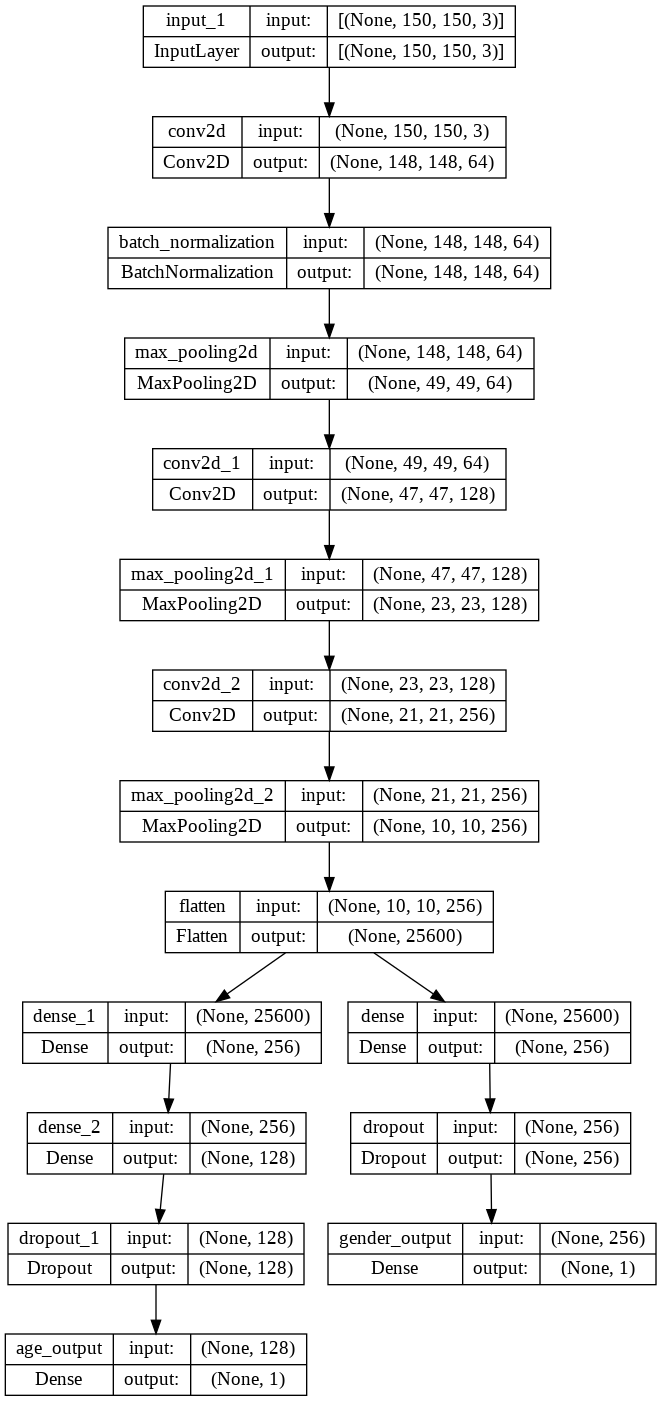

In [ ]:
model1.summary()
tf.keras.utils.plot_model(model1,show_shapes=True)

De la gráfica generada de la estructura de la red se aprecian las 2 ramas para la predicción de las 2 etiquetas. Ahora, el siguiente paso es realizar el entrenamiento de la red, el cual se muestra a continuación:

In [ ]:
# Almacenamiento del modelo
best_callback = tf.keras.callbacks.ModelCheckpoint(filepath="Model1", monitor="val_loss", 
                                                   verbose=True, save_best_only=True,
                                                   save_weights_only=True, mode="min")

# Entrenamiento
hist_m1 = model1.fit(x=x_train, y=[y_train_gen, y_train_age], batch_size = 10, validation_split= 0.1,
                     epochs=20, callbacks=[best_callback])

Epoch 1/20
377/378 [============================>.] - ETA: 0s - loss: 17.6062 - gender_output_loss: 0.6432 - age_output_loss: 16.9629 - gender_output_accuracy: 0.6631 - age_output_accuracy: 0.0414
Epoch 1: val_loss improved from inf to 20.26159, saving model to Model1
378/378 [==============================] - 16s 20ms/step - loss: 17.6054 - gender_output_loss: 0.6427 - age_output_loss: 16.9627 - gender_output_accuracy: 0.6635 - age_output_accuracy: 0.0413 - val_loss: 20.2616 - val_gender_output_loss: 0.5267 - val_age_output_loss: 19.7349 - val_gender_output_accuracy: 0.7738 - val_age_output_accuracy: 0.0548
Epoch 2/20
378/378 [==============================] - ETA: 0s - loss: 13.2755 - gender_output_loss: 0.4998 - age_output_loss: 12.7757 - gender_output_accuracy: 0.7595 - age_output_accuracy: 0.0272
Epoch 2: val_loss improved from 20.26159 to 11.47282, saving model to Model1
378/378 [==============================] - 7s 19ms/step - loss: 13.2755 - gender_output_loss: 0.4998 - age_out

Con el modelo entrenado es posible evaluarlo y observar su rendimiento, por lo que a continuación se muestran las gráficas de pérdida y accuracy para los datos de entrenamiento y validación al predecir el género de la persona:

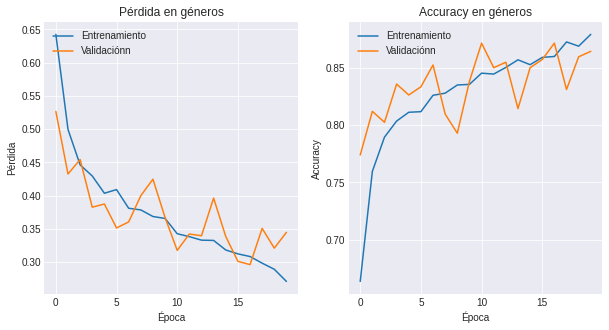

In [ ]:
plt.figure(figsize=(10,5))
# Pérdida
plt.subplot(121)
plt.plot(hist_m1.history['gender_output_loss'])
plt.plot(hist_m1.history['val_gender_output_loss'])
plt.title('Pérdida en géneros')
plt.xlabel("Época");
plt.ylabel("Pérdida");
plt.legend(['Entrenamiento', 'Validaciónn'], loc='upper left');
# Accuracy
plt.subplot(122)
plt.plot(hist_m1.history['gender_output_accuracy'])
plt.plot(hist_m1.history['val_gender_output_accuracy'])
plt.title('Accuracy en géneros')
plt.xlabel("Época");
plt.ylabel("Accuracy");
plt.legend(['Entrenamiento', 'Validaciónn'], loc='upper left');

Las gráficas dejan ver que la pérdida y el accuracy para el conjunto de validación tienen grandes fluctuaciones a lo largo de las épocas que puede deberse a la estructura misma de la red neuronal utilizada. Aún así, el accuracy se mantiene arriba del 80% en la gran mayoría de las épocas.

Estas mismas gráficas se realizan ahora para las predicciones de la edad, obteniendo los siguientes resultados:

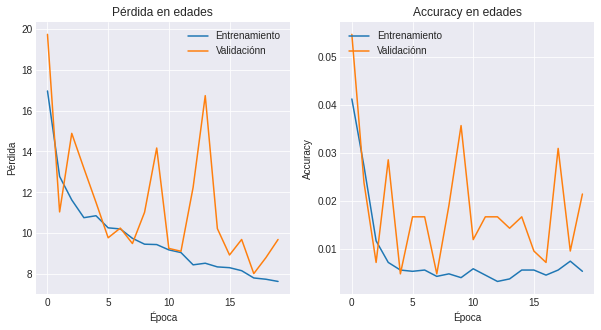

In [ ]:
plt.figure(figsize=(10,5))
# Pérdida
plt.subplot(121)
plt.plot(hist_m1.history['age_output_loss'])
plt.plot(hist_m1.history['val_age_output_loss'])
plt.title('Pérdida en edades')
plt.xlabel("Época");
plt.ylabel("Pérdida");
plt.legend(['Entrenamiento', 'Validaciónn'], loc='upper right')
# Accuracy
plt.subplot(122)
plt.plot(hist_m1.history['age_output_accuracy'])
plt.plot(hist_m1.history['val_age_output_accuracy'])
plt.title('Accuracy en edades')
plt.xlabel("Época");
plt.ylabel("Accuracy");
plt.legend(['Entrenamiento', 'Validaciónn'], loc='upper left');

En este caso, la magnitud de la pérdida observada es mucho mayor a la de las predicciones del género, a pesar de observar un comportamiento levemente descendente a lo largo de las épocas. Lo anterior justifica lo visto en la gráfica de accuracy, donde el modelo parece predecir de peor manera la edad a medida que se entrena el modelo con el paso de las épocas. Así mismo, el comportamiento fluctuante en ambas gráficas reafirma que debe modificarse la estructura de la red neuronal y/o hiperparámetros como la tasa de aprendizaje.

Estas gráficas de evaluación del modelo se complementan con los reportes de clasificación que ofrece scikit-learn con métricas como el recall, f1-score y precision, así que realizando las predicciones que hace el modelo sobre el conjunto de prueba:

In [ ]:
# Predicción para elementos de prueba
pred = np.array(model1.predict(x_test, batch_size=32))
pred_gen = [round(i[0]) for i in pred[0]]
pred_age = [round(i[0]) for i in pred[1]]

57/57 [==============================] - 1s 13ms/step


Y los resultados que se obtienen para la edad predicha son los siguientes:

In [ ]:
model1.load_weights("Model1")
print(classification_report(y_test_age, pred_age))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.36      0.05      0.09        98
         2.0       0.25      0.04      0.07        47
         3.0       0.33      0.08      0.13        24
         4.0       0.00      0.00      0.00        14
         5.0       0.08      0.08      0.08        12
         6.0       0.10      0.12      0.11         8
         7.0       0.09      0.08      0.09        12
         8.0       0.09      0.06      0.07        16
         9.0       0.00      0.00      0.00        18
        10.0       0.17      0.07      0.10        15
        11.0       0.07      0.33      0.11         3
        12.0       0.00      0.00      0.00         9
        13.0       0.10      0.10      0.10        10
        14.0       0.00      0.00      0.00        15
        15.0       0.00      0.00      0.00        13
        16.0       0.00      0.00      0.00        16
        17.0       0.10    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

Donde los resultados obtenidos son bajos como los vistos en las gráficas anteriores. Otra de las posibles soluciones a este problema puede ser la manera en la que se evalúan las predicciones de esta etiqueta, ya que si la edad predicha por el modelo difiere en al menos 1 año de la edad real de la persona, se considera como una clasificación incorrecta. Es por lo anterior que podría dividirse por intervalos las regiones de edades y de esta manera los resultados podrían ser mejores.

Se realiza un reporte para las predicciones del género de manera idéntica a los de la edad:

In [ ]:
print(classification_report(y_test_gen, pred_gen))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       964
           1       0.85      0.71      0.78       836

    accuracy                           0.81      1800
   macro avg       0.82      0.80      0.81      1800
weighted avg       0.82      0.81      0.81      1800



Lo que muestra una notable diferencia con lo visto para las edades, ya que la capacidad de predicción del género es cercana al 80%. Dichos resultados pueden visualizarse en una matriz de confusión de manera más intuitiva como muestra la siguiente gráfica:

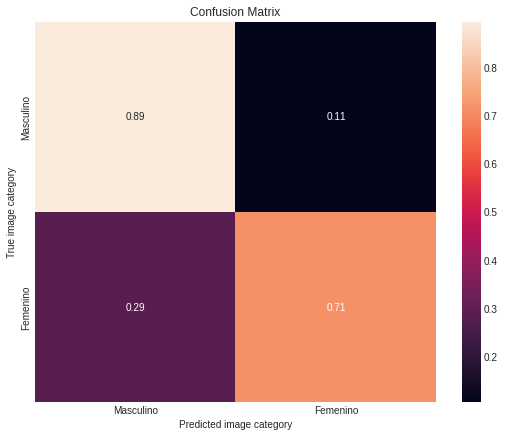

In [ ]:
plt.figure(figsize=(9,7))
cm = confusion_matrix(y_test_gen, pred_gen)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
CM = sns.heatmap(cmn, xticklabels = genero.values(), yticklabels = genero.values(), annot = True)
CM.set_ylabel('True image category')
CM.set_xlabel('Predicted image category')
CM.set_title('Confusion Matrix')
plt.show()
plt.close()

Con el objetivo de mejorar los resultados de la red neuronal utilizada anteriormente, se creará otra red neuronal convolucional con regularizadores en las capas de convolución, de tal manera que junto con las capas de dropout obtener un modelo no sobreajustado, luego:

In [ ]:
input_size = (150,150,3)
inputs = Input((input_size))
# Capa de convolución con regularización
X = Conv2D(64, (3, 3), activation='relu', kernel_initializer = glorot_uniform(seed=0), kernel_regularizer=l2(0.01))(inputs)
# Capas de normalización y pooling
X = BatchNormalization(axis = 3)(X)
X = MaxPooling2D((3, 3))(X)
# Capas de convolución con regularización y pooling
X = Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.01))(X)
X = MaxPooling2D((2, 2), strides=(2, 2))(X)
# Otro par de capas de convolución con regularización y pooling
X = Conv2D(256, (3, 3), activation='relu', kernel_regularizer=l2(0.01))(X)
X = MaxPooling2D((2, 2))(X)

X = Flatten()(X)
# Capas que replican la anterior red neuronal
dense_1 = Dense(256, activation='relu')(X)
dense_2 = Dense(256, activation='relu')(X)
dense_3 = Dense(128, activation='relu')(dense_2)
dropout_1 = Dropout(0.4)(dense_1)
dropout_2 = Dropout(0.4)(dense_3)
output_1 = Dense(1,activation='sigmoid', name='gender_output')(dropout_1)
output_2 = Dense(1, activation='relu', name='age_output')(dropout_2)

model2 = Model(inputs=[inputs], outputs=[output_1,output_2])

Al igual que en la anterior red, compilamos el modelo y agregamos un early stop para frenar el entrenamiento en caso de no haber mejoría en los resultados:

In [ ]:
model2.compile(loss=['binary_crossentropy','mae'], optimizer=tf.optimizers.Adam(learning_rate=1e-3), metrics=['accuracy'])

In [ ]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath="Model2", monitor="val_loss", 
                                                   verbose=True, save_best_only=True,
                                                   save_weights_only=True, mode="min")
# Agregación de un early stop por si el modelo no mejora
early_stop=tf.keras.callbacks.EarlyStopping(patience=80, monitor='val_loss',restore_best_weights=True)

callbacks=[checkpoint, early_stop]

hist_m2 = model2.fit(x=x_train, y=[y_train_gen, y_train_age], batch_size = 10, validation_split= 0.1,
                     epochs=20, callbacks=[callbacks])

Epoch 1/20
376/378 [============================>.] - ETA: 0s - loss: 18.3398 - gender_output_loss: 0.7330 - age_output_loss: 16.0335 - gender_output_accuracy: 0.6713 - age_output_accuracy: 0.0423
Epoch 1: val_loss improved from inf to 31.10844, saving model to Model2
378/378 [==============================] - 9s 21ms/step - loss: 18.3321 - gender_output_loss: 0.7323 - age_output_loss: 16.0291 - gender_output_accuracy: 0.6720 - age_output_accuracy: 0.0421 - val_loss: 31.1084 - val_gender_output_loss: 0.6393 - val_age_output_loss: 29.3626 - val_gender_output_accuracy: 0.5881 - val_age_output_accuracy: 0.0476
Epoch 2/20
376/378 [============================>.] - ETA: 0s - loss: 13.9309 - gender_output_loss: 0.4695 - age_output_loss: 12.5335 - gender_output_accuracy: 0.7739 - age_output_accuracy: 0.0215
Epoch 2: val_loss improved from 31.10844 to 11.70769, saving model to Model2
378/378 [==============================] - 7s 20ms/step - loss: 13.9036 - gender_output_loss: 0.4685 - age_outp

Ahora mostramos gráficamente los resultados de pérdida de accuracy para este nuevo modelo, empezando por la etiqueta de género

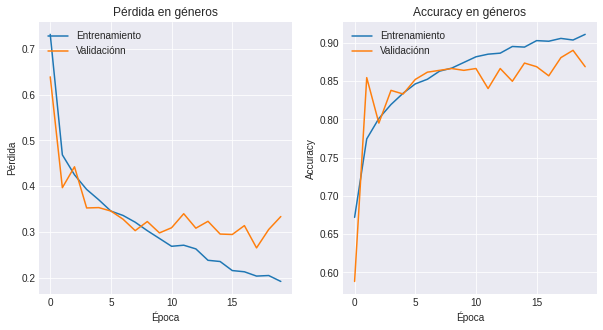

In [ ]:
plt.figure(figsize=(10,5))
# Pérdida
plt.subplot(121)
plt.plot(hist_m2.history['gender_output_loss'])
plt.plot(hist_m2.history['val_gender_output_loss'])
plt.title('Pérdida en géneros')
plt.xlabel("Época");
plt.ylabel("Pérdida");
plt.legend(['Entrenamiento', 'Validaciónn'], loc='upper left')
# Accuracy
plt.subplot(122)
plt.plot(hist_m2.history['gender_output_accuracy'])
plt.plot(hist_m2.history['val_gender_output_accuracy'])
plt.title('Accuracy en géneros')
plt.xlabel("Época");
plt.ylabel("Accuracy");
plt.legend(['Entrenamiento', 'Validaciónn'], loc='upper left');

A diferencia de los resultados de la primera red neuronal, las fluctuaciones que se presentan ahora son bastante menores, además el accuracy se mantiene en valores similares a los observados en el caso anterior, indicando buenos resultados de manera general.

La etiqueta de las edades, por su parte, muestra los siguientes resultados gráficos:

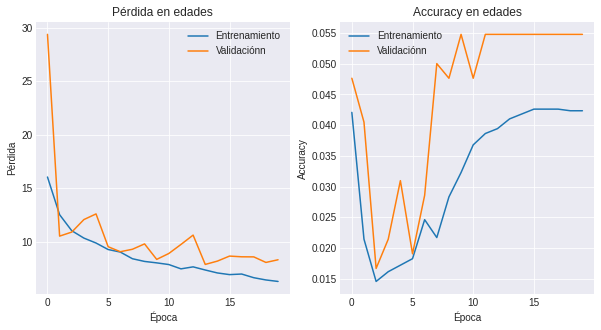

In [ ]:
plt.figure(figsize=(10,5))
# Pérdida
plt.subplot(121)
plt.plot(hist_m2.history['age_output_loss'])
plt.plot(hist_m2.history['val_age_output_loss'])
plt.title('Pérdida en edades')
plt.xlabel("Época");
plt.ylabel("Pérdida");
plt.legend(['Entrenamiento', 'Validaciónn'], loc='upper right')
# Accuracy
plt.subplot(122)
plt.plot(hist_m2.history['age_output_accuracy'])
plt.plot(hist_m2.history['val_age_output_accuracy'])
plt.title('Accuracy en edades')
plt.xlabel("Época");
plt.ylabel("Accuracy");
plt.legend(['Entrenamiento', 'Validaciónn'], loc='upper left');

Nuevamente, los valores reportados de pérdida son bastante más altos a los vistos para la etiqueta de género, sin embargo, las fluctuaciones son mucho menores tal como ocurrió con la otra salida de la red neuronal. Aún así, los resultados del accuracy siguen siendo bajos, pero ya no presentan un comportamiento de decrecimiento a medida que aumentan las épocas.

Realizamos las predicciones que hace el modelo sobre el conjunto de prueba para observar los resultados en otras métricas:

In [ ]:
# Predicciones del conjunto de prueba
pred = np.array(model2.predict(x_test, batch_size=32))
pred_gen = [round(i[0]) for i in pred[0]]
pred_age = [round(i[0]) for i in pred[1]]

57/57 [==============================] - 1s 11ms/step


Empezando por las predicciones de la edad se tienen los siguientes resultados:

In [ ]:
model2.load_weights("Model2")
print(classification_report(y_test_age, pred_age))

              precision    recall  f1-score   support

         1.0       0.63      0.72      0.68        98
         2.0       0.35      0.28      0.31        47
         3.0       0.09      0.08      0.09        24
         4.0       0.04      0.07      0.05        14
         5.0       0.00      0.00      0.00        12
         6.0       0.11      0.12      0.12         8
         7.0       0.09      0.08      0.09        12
         8.0       0.00      0.00      0.00        16
         9.0       0.10      0.06      0.07        18
        10.0       0.00      0.00      0.00        15
        11.0       0.00      0.00      0.00         3
        12.0       0.00      0.00      0.00         9
        13.0       0.00      0.00      0.00        10
        14.0       0.00      0.00      0.00        15
        15.0       0.14      0.08      0.10        13
        16.0       0.29      0.12      0.17        16
        17.0       0.00      0.00      0.00         9
        18.0       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

Los resultados vistos son similares a los de la anterior red neuronal, y además de deberse parcialmente a la manera en la que se evalúa una clasificación correcta, ignorando la cercanía que pueda tener la predicción al valor real, otra posible razón consiste en las pocas imágenes que habían de ciertas edades, las cuales probablemente fueron pocas veces predichas.

Los resultados para el género de la persona se muestran a continuación:

In [ ]:
print(classification_report(y_test_gen, pred_gen))

              precision    recall  f1-score   support

           0       0.89      0.84      0.87       964
           1       0.83      0.88      0.85       836

    accuracy                           0.86      1800
   macro avg       0.86      0.86      0.86      1800
weighted avg       0.86      0.86      0.86      1800



En este caso los resultados mejoran en algunos puntos porcentuales respecto a los vistos con el primer modelo entrenado, indicando que los regularizadores usados contribuyeron de manera positiva a mejorar la red original.

Al igual que con la primera red neuronal, puede mostrarse los resultados para la etiqueta de género como una matriz de confusión:

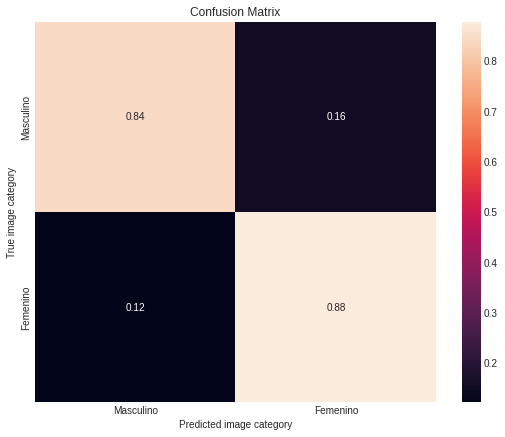

In [ ]:
plt.figure(figsize=(9,7))
cm = confusion_matrix(y_test_gen, pred_gen)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
CM = sns.heatmap(cmn, xticklabels = genero.values(), yticklabels = genero.values(), annot = True)
CM.set_ylabel('True image category')
CM.set_xlabel('Predicted image category')
CM.set_title('Confusion Matrix')
plt.show()
plt.close()